<a href="https://colab.research.google.com/github/IshaSinghVatsa/MACHINE-LEARNING/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we are using column 3 and 4 which is 'trtbps' and 'chol'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn

dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:, [3, 4]].values
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Applying elbow method: **
Here graph is coming as elbow at an optimum value of 4

In [ ]:
kmeans = KMeans(n_clusters = 6, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

Scatter plot for showing 6 clusters  

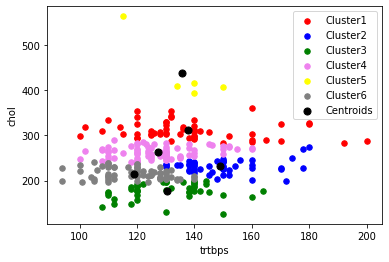

In [ ]:
plt.scatter( X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Cluster1') 
plt.scatter( X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster2')
plt.scatter( X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster3') 
plt.scatter( X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'violet', label = 'Cluster4') 
plt.scatter( X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'yellow', label = 'Cluster5') 
plt.scatter( X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 30, c = 'grey', label = 'Cluster6')
plt.scatter( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.xlabel('trtbps') 
plt.ylabel('chol') 
plt.legend() 

plt.show()

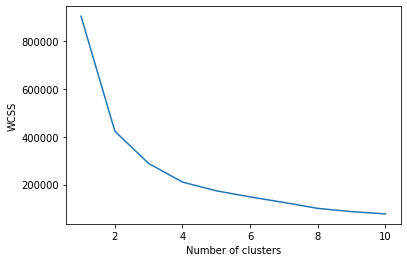

In [ ]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

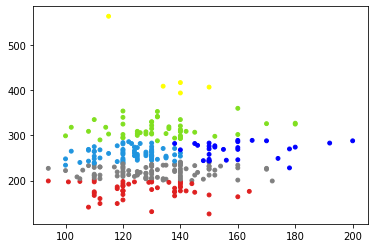

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=6)
dataset['cluster'] = kmeans.fit_predict(dataset[[ 'trtbps','chol']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
dataset['cen_x'] = dataset.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5]})
dataset['cen_y'] = dataset.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3], 4:cen_y[4], 5:cen_y[5]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','yellow','grey','blue']
dataset['c'] = dataset.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5]})
import matplotlib.pyplot as plt
plt.scatter(dataset.trtbps, dataset.chol, c=dataset.c, alpha = 1.0, s=15)

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("BankChurners.csv")
df.head()

plt.scatter(df.Customer_Age,df['Credit_Limit'])
plt.xlabel('Customer_Age')
plt.ylabel('Credit_Limit')

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Customer_Age','Credit_Limit']])
y_predicted

df['cluster']=y_predicted
df.head()

km.cluster_centers_

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Customer_Age,df1['Credit_Limit'],color='green')
plt.scatter(df2.Customer_Age,df2['Credit_Limit'],color='red')
plt.scatter(df3.Customer_Age,df3['Credit_Limit'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Customer_Age')
plt.ylabel('Credit_Limit')
plt.legend()

scaler = MinMaxScaler()

scaler.fit(df[['Credit_Limit']])
df['Credit_Limit'] = scaler.transform(df[['Credit_Limit']])

scaler.fit(df[['Customer_Age']])
df['Customer_Age'] = scaler.transform(df[['Customer_Age']])

df.head()

plt.scatter(df.Customer_Age,df['Credit_Limit'])

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Customer_Age','Credit_Limit']])
y_predicted

df['cluster']=y_predicted
df.head()

km.cluster_centers_

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Customer_Age,df1['Credit_Limit'],color='green')
plt.scatter(df2.Customer_Age,df2['Credit_Limit'],color='red')
plt.scatter(df3.Customer_Age,df3['Credit_Limit'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Customer_Age','Credit_Limit']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

